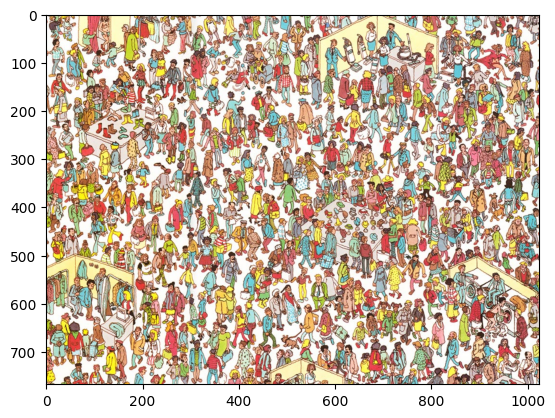

In [15]:
import mahotas.demos
from pylab import imshow, show
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont, ImageEnhance
import random
wally=mahotas.demos.load('Wally')
imshow(wally)

In [19]:
background_dir = 'images/LandOfWoofs.png'
waldo_dir = 'images/waldo0.png'
# wilma_dir = 'images/wilma.png'

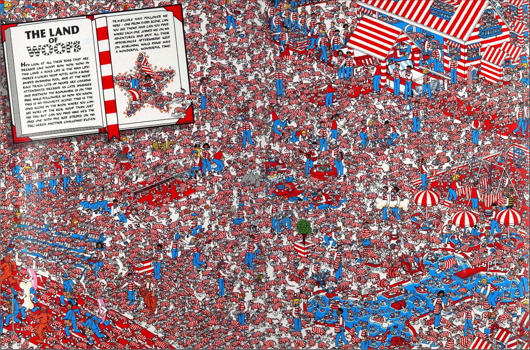

In [20]:
background_im = Image.open(background_dir)
background_im = background_im.resize((530,350))
background_im

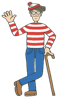

In [8]:
waldo_im = Image.open(waldo_dir)
waldo_im = waldo_im.resize((60, 100))
waldo_im

In [27]:
def generate_sample_image():
    
    #background image
    background_im = Image.open(background_dir).convert("RGB")
    background_im = background_im.resize((500, 350))
    #background_im = Image.new("RGB", (500, 350), (255, 255, 255))

    # randomly cut up waldo
    waldo_im = Image.open(waldo_dir)
    waldo_im = waldo_im.resize((15, 25))
    waldo_width, waldo_height = waldo_im.size 
    # waldo_section_width = random.randint(40, 60)
    # waldo_section_height = random.randint(50, 100)
    # # Generate random x and y coordinates for the top-left corner of the section
    # x = random.randint(0, waldo_width - waldo_section_width)
    # y = 0 
    # waldo_im = waldo_im.crop((x, y, x + waldo_section_width, y + waldo_section_height))

    # # randomly cut up wilma
    # wilma_im = Image.open(wilma_dir)
    # wilma_im = wilma_im.resize((60, 100))
    # wilma_width, wilma_height = wilma_im.size
    # wilma_section_width = random.randint(40, 60)
    # wilma_section_height = random.randint(50, 100) 
    # Generate random x and y coordinates for the top-left corner of the section
    # x = random.randint(0, wilma_width - wilma_section_width)
    # y = 0 
    # wilma_im = wilma_im.crop((x, y, x + wilma_section_width, y + wilma_section_height))
    
    #select x and y coordinates randomly we'll select between (0, 430) and (0, 250)
    col = np.random.randint(0, 410)
    row = np.random.randint(0, 230)
    
    #pic randomly between waldo and wilma. If 1 we will select waldo. if 0 we wills elect wilma
    rand_person = np.random.choice([0, 1], p = [0.5, 0.5])
    rand_person = 1
    if rand_person == 1:
        
        background_im.paste(waldo_im, (col, row), mask = waldo_im)
        cat = 'Waldo'
        
    # else:
        
    #     background_im.paste(wilma_im, (col, row), mask = wilma_im)
    #     cat = 'Wilma'
        
    return np.array(background_im).astype('uint8'), (col, row), rand_person, cat 

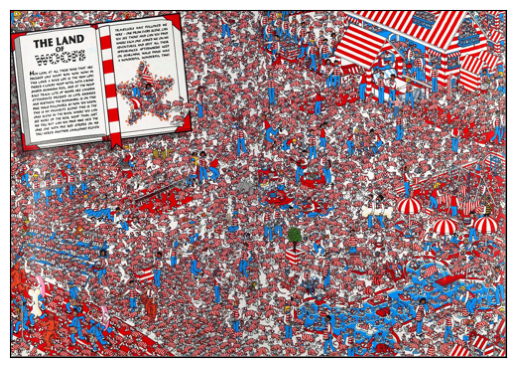

In [28]:
sample_im, pos, _, cat = generate_sample_image()
plt.imshow(sample_im)
plt.xticks([])
plt.yticks([])
plt.show()

In [29]:
wally = sample_im

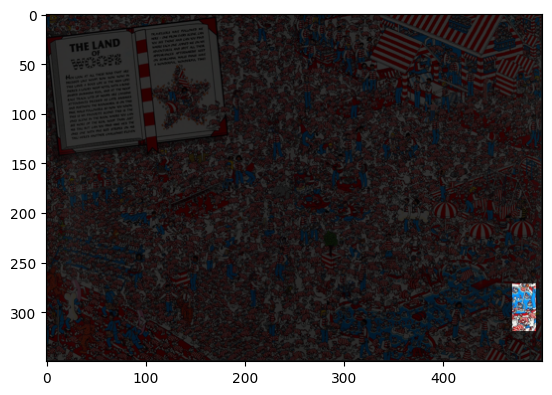

In [30]:
wfloat = wally.astype(float)
r,g,b = wfloat.transpose((2,0,1))
w = wfloat.mean(2)
pattern = np.ones((24,16), float)
for i in range(2):
    pattern[i::4] = -1
v = mahotas.convolve(r-w, pattern)
mask = (v == v.max())
mask = mahotas.dilate(mask, np.ones((48,24)))
np.subtract(wally,0.8*wally * ~mask[:,:,None], out=wally,casting='unsafe')
imshow(wally)